# Boostrapping - Intervalo de confiança para tomada de decisão

## Aula 23

**Preparo Prévio:**
1. Magalhães e Lima, seção 7.4. Concentrar-se em intervalo de confiança para média amostra
1. Bootstrapping - https://www.thoughtco.com/example-of-bootstrapping-3126155
1. Bootstrapping - https://www.stat.auckland.ac.nz/~wild/BootAnim/

**Hoje:**
1. Entender e implementar o método não paramétrico de Bootstrapping 

**Próxima aula:**
1. Montogmery. Seção 6-2 - Simple Linear Regression
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples

___


___
# Bootstrapping

## Solução: Métodos não paramétricos

Bootstrapping é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Por exemplo, podemos utilizar a média como medida de interesse, mas a distribuição de outras medidas também pode ser estimadas, como por exemplo variância, mediana, etc.

Reamostragem com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido. Seria equivalente a sortear um número e por de volta na urna.

### Como funciona

Dada um conjunto com a amostra mestre aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecutivamente, com reposição, conjuntos de tamanho também $n$ dessa amostra amostra mestre. Esses conjuntos são chamados de reamostragem e esse processo deve ser feito milhares de vezes.

A cada reamostragem deve-se aplicar a medida de interesse, nesse caso a média, e guardar em uma lista. Ao fim das milhares de reamostragens, teremos uma distribuição da medida desejada. 

De posse desta distribuição, podemos calcular o Intervalo de Confiança por meio dos seus percentis fixando a confiança que se deseja no mesmo.

<img src="Bootstrap.png"/>
<center><sup>**Figura 1.** Ilustração da técnica Bootstrap - reamostragens da amostra mestre (extraído e adaptado de http://robertovitillo.com/2015/03/15/confidence-intervals-and-hypothesis-tests-for-engineers/).</sup></center>


Devido a sua generalidade, a técnica Bootstrap se encaixa na solução de problemas complexos que queiram utilizar outra informação numérica populacional (parâmetro de interesse) que não seja necessariamente a média populacional. 
Por meio dessa técnica, os parâmetros como média, variância, proporção e até mesmo parâmetros menos utilizados como o máximo, mínimo ou mediana de uma população podem ser estimados pontualmente e por intervalo.

A distribuição Bootstrap geralmente tem a mesma forma e amplitude que a distribuição amostral da estatística, porém a primeira está centrada na estatística dos dados originais (amostra mestre), enquanto a segunda está centrada no parâmetro da população. Assim, se o objetivo for estudar a média populacional ($\mu$), a distribuição Bootstrap será construída com as médias das reamostras ($\bar{x}^*_j$), com $j=1,\ldots,B$ e estará centrada na média da amostra mestre ($\bar{x}$); enquanto a distribuição das médias amostrais obtidas da população ($\bar{X}$) está centrada em $\mu$ conforme descreve o Teorema do Limite Central (TLC) e conforme visto na simulação do Encontro 12.

<img src="DistBootstrap.png"/>
<center><sup>**Figura 2.** Construção da distribuição Bootstrap a partir das médias das reamostras.</sup></center>

___
# Intervalo de confiança Bootstrap


** Intervalo de Confiança Bootstrap Percentil **

$IC(\mu;\gamma) = \left(q_{\frac{1-\gamma}{2}}; q_{\frac{1+\gamma}{2}} \right),$

sendo $q_{\frac{1-\gamma}{2}}$ o quantil de ordem ((1-$\gamma$)/2)100$\%$ e $q_{\frac{1+\gamma}{2}}$ o quantil de ordem ((1+$\gamma$)/2)100$\%$ das médias das reamostras, ou seja, os quantis das  médias $\bar{x}^*_j$, com $j=1,\ldots,B$.

** Observação: **
A técnica Boostrap nos permite verificar o vício olhando se a distribuição das médias reamostradas (distribuição Bootstrap) está centrada na média da amostra mestre, ou seja, no caso, avaliar a diferença entre $\bar{\bar{x}}^*$ e $\bar{x}$. Caso essa diferença seja grande ou se os intervalos de confiança construídos não sejam parecidos, é necessário buscar outros intervalos de confiança que façam a correção desse viés. Não abordaremos aqui!

___


**Algoritmo**
 
   1. Repetir 10.000 vezes:
           1.1. Realizar um sorteio com reposição da amostra mestre. Usar a função choice() do numpy.
           1.2. Calcular a medida de interesse da reamostragem e guardar em uma lista.
   2. Plotar o histograma dessa lista de medidas de calculadas anteriormente.
   3. A partir da lista, encontrar os percentis de ordem $\alpha/2$ e $(1-\alpha)/2$ para construir Intervalo de Confiança Boostrap, sendo $\alpha=1-\gamma$.
   4. Se objetivo for tomada de decisão, avalie se o valor sob alguma hipótese faz parte ou não do intervalo de confiança construído!

___
    

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
from scipy import stats
import math

%matplotlib inline


___
# Exercício do Termopar - Determinação de intervalo de confiança

O tempo de vida, em horas, de um termopar* usado em fornalhas é suposto ser aproximadamente normal. Uma amostra aleatória de 15 termopares resultaram nos seguintes tempos:

`553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529`

A empresa diz que um termopar deve durar, em média, 560 horas. Há evidências de que essa afirmação seja verdadeira? Considere um coeficiente de confiança de 95%.


In [3]:
dados = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
dados = pd.Series(dados)
n = len(dados)

In [4]:
#Estimativas
xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)


Média:  551.3333333333334
Desvio padrão amostral:  14.811514182586208


In [5]:
#Construção das Reamostragens da amostra mestre (dados) com reposição
n = 10
xbarra_Boot = []


B = 10000
for i in range(B):
    reamostra = np.random.choice(dados, size = n, replace = True)
    xbarra_Boot.append(np.mean(reamostra))
    
    # Gera uma reamostra dos dados _com_ reposição
    # Continue...

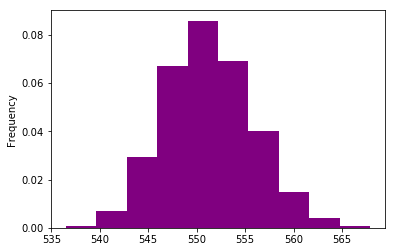

In [6]:
# Distribuição Bootstrap 
# Continue...

xbarra_boot = pd.Series(xbarra_Boot)

xbarra_boot.plot.hist(normed= True, color = 'purple')

In [14]:
# Intervalo de confiança Bootstrap Percentil (ou Quantil)
# Confiança = 0.95 ou seja Alpha = 0.05

#o percentile acha o valor naquela porcentagem que voce quer
#Aqui, vai achar o valor minimo (xcesquerda) e maximo (xcdireita) 
#O intervalo de conficanca eh o intervalo entre essos dois valores
#se valor suspeito estiver fora,

xcesquerda = np.percentile(xbarra_boot,2.5)

xcdireita = np.percentile(xbarra_Boot,100-2.5)

# Continue...

print('x critico esquerdo:',xcesquerda)
print('x critico direita:',xcdireita)
print('O intervalo de confianca esta entre {0} e {1}'.format(xcesquerda,xcdireita))

x critico esquerdo: 542.9
x critico direita: 560.6
O intervalo de confianca esta entre 542.9000000000001 e 560.6


In [15]:
#xbarra_boot.describe()

Tomada de decisão:
560 pertence a regiao de confianca. Assim, a empresa diz uma afirmacao verdadeira.

___

# Qualidade da linha de produção

As latas de certa marca de refrigerante apresentam em seu rótulo o volume de 350 ml. Ainda, um órgão regulador diz que a dispersão dessas quantidades deve ser no máximo de 10 ml em seu conteúdo. 

** Linha de produção deve ser parada? **

Conjectura 1: O fabricante deseja testar se o conteúdo médio das latas é igual a 350 ml, como anunciado no rótulo. Isto equivale a verificar se a máquina está regulada para colocar 350 ml, ou não, nas latas. 

Conjectura 2: O fabricante deseja avaliar se a variabilidade dos conteúdos está sendo respeitada ou não.


Para averiguar tais hipóteses do fabricante, foi coletada uma amostra de 36 latas do refrigerante em pontos de comercialização e mediu-se o conteúdo destas latas.

Os resultados obtidos na amostra foram:

dados = [344.5,  352.9,  355.0,  348.8,
        	342.0,  344.7,  346.9,  340.9,
            357.7,  341.2,  347.1,  365.3,
            340.3,  343.2,  342.6,  333.7,
        	341.9,  351.0,  348.0,  354.3,
        	344.9,  348.0,  346.4,  358.0,
        	340.2,  354.4,  349.7,  339.4,
        	338.8,  344.9,  330.4,  341.7,
        	336.7,  363.2,  355.9,  357.4]


Avalie tais hipóteses com 95% de confiança?

Responda se a linha de produção deve ser interrompida e por qual motivo?

In [16]:
dadosl = [344.5,  352.9,  355.0,  348.8,
            342.0,  344.7,  346.9,  340.9,
            357.7,  341.2,  347.1,  365.3,
            340.3,  343.2,  342.6,  333.7,
            341.9,  351.0,  348.0,  354.3,
            344.9,  348.0,  346.4,  358.0,
            340.2,  354.4,  349.7,  339.4,
            338.8,  344.9,  330.4,  341.7,
            336.7,  363.2,  355.9,  357.4]

dadosl = pd.Series(dadosl)
nl = len(dadosl)

In [17]:
#Conjectura 1: lista deverá ser construída com médias. Achar media dos volumes das latas

xbarralata = dadosl.mean()
dplata = np.std(dadosl,ddof=1)

print("Média: ", xbarralata)
print("Desvio padrão amostral: ", dplata)

#a maquina nao esta regulada

Média:  347.0
Desvio padrão amostral:  7.990601622263139


In [18]:
#Conjectura 2: lista deverá ser construída com desvios padrões amostrais

xdesviosboot = []

for i in range(10000):
    reamostraL = np.random.choice(dadosl, size = 36, replace = True)
    xdesviosboot.append(np.std(reamostraL, ddof = 1))
    
    # Gera uma reamostra dos dados _com_ reposição

In [19]:
xdesviosboot = pd.Series(xdesviosboot)

xce = np.percentile(xdesviosboot, 2.5)

xcd = np.percentile(xdesviosboot, 100-2.5)

print('x critico esquerdo:',xce)
print('x critico direito:',xcd)
print('O intervalo de confianca esta entre {0} e {1}'.format(xce,xcd))

x critico esquerdo: 6.12897036838
x critico direito: 9.52465930221
O intervalo de confianca esta entre 6.12897036837783 e 9.524659302209809


O intervalo de confianca eh menor que 10ml. Entao nao ha necessidade de que a producao seja interrompida

___

# Experimento dos resistores - APS7 (um dos exercícios)

** Compraria o lote de resistores pelo valor médio e pela tolerância? **

Use a sua amostra para concluir se compraria o lote de resistores pelo controle de qualidade tanto quanto aos $1000 k\Omega$ e quanto aos $5\%$ de tolerância.

Use 95% de confiança para tomada de decisão!

In [20]:
resistores=[1027,1057,1019,999,1033,1027,1063,1028,1029,1052,1024,1007,1035]

resistores = pd.Series(resistores)
nr = len(resistores)

#para uma mi=1000, o dp= 50

In [21]:
xzinhobr = resistores.mean()
despad = np.std(resistores, ddof = 1)

print("Média: ", xzinhobr)
print("Desvio padrão amostral: ", despad)

Média:  1030.7692307692307
Desvio padrão amostral:  18.253556028684045


In [27]:
xbrboot = []

xdespadboot = []

for i in range(10000):
    reamost = np.random.choice(resistores, size = 13, replace = True)
    xbrboot.append(np.mean(reamost))
    xdespadboot.append(np.std(reamost, ddof=1))

In [28]:
xbrboot = pd.Series(xbrboot)

#fazerndo o limite pela media
xcem = np.percentile(xbrboot,2.5)
xcdm = np.percentile(xbrboot, 100-2.5)

print('x critico esquerdo:',xcem)
print('x critico direito:',xcdm)
print('O intervalo de confianca esta entre {0} e {1}'.format(xcem,xcdm))

x critico esquerdo: 1021.30769231
x critico direito: 1040.46153846
O intervalo de confianca esta entre 1021.3076923076923 e 1040.4615384615386


In [29]:
xdespadboot = pd.Series(xdespadboot)

#fazendo o limite pelo desvio padrao
xcedp = np.percentile(xdespadboot,2.5)
xcddp = np.percentile(xdespadboot, 100-2.5)

print('x critico esquerdo:',xcedp)
print('x critico direito:',xcddp)
print('O intervalo de confianca esta entre {0} e {1}'.format(xcedp,xcddp))

x critico esquerdo: 10.3164199535
x critico direito: 23.1680316876
O intervalo de confianca esta entre 10.316419953454075 e 23.16803168760431


 O lote de resistores seria comprado, pois está dentro do intervalo de confiança, tanto em média como em desvio padão.